<img src="https://dsiag.ch/images/dsi_rgb.png" alt="dsi logo" width="100" style="position: absolute; right: 0px;"/>

# Electricity production plants - Visualisation Plots




Data origins from https://opendata.swiss/en/dataset/elektrizitatsproduktionsanlagen and we use the following .csv files.

- ElectricityProductionPlant.csv 
- MainCategoryCatalogue.csv
- SubCategoryCatalogue.csv
- PlantCategoryCatalogue.csv



### Loading data

We use `pd.read_csv` to read the csv files into a `DataFrame`. 

After reading we set the index to the corresponding column which makes it easier to join tables and join the (sub)-category names in order to have all information in one `epp` table 

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 10)

epp = pd.read_csv('../data/ch.bfe.elektrizitaetsproduktionsanlagen/ElectricityProductionPlant.csv', parse_dates=['BeginningOfOperation']).set_index('xtf_id')
mainCat = pd.read_csv('../data/ch.bfe.elektrizitaetsproduktionsanlagen/MainCategoryCatalogue.csv').set_index('Catalogue_id')
subCat = pd.read_csv('../data/ch.bfe.elektrizitaetsproduktionsanlagen/SubCategoryCatalogue.csv').set_index('Catalogue_id')
plantCat = pd.read_csv('../data/ch.bfe.elektrizitaetsproduktionsanlagen/PlantCategoryCatalogue.csv').set_index('Catalogue_id')

lang='de'

epp = epp.merge(mainCat[lang].rename("MainCategoryName"),how='left', left_on='MainCategory', right_index=True)
epp = epp.merge(subCat[lang].rename("SubCategoryName"),how='left', left_on='SubCategory', right_index=True)
epp = epp.merge(plantCat[lang].rename("PlantCategoryName"),how='left', left_on='PlantCategory', right_index=True)


display(epp.head())

,Address,PostCode,Municipality,Canton,BeginningOfOperation,InitialPower,TotalPower,MainCategory,SubCategory,PlantCategory,_x,_y,MainCategoryName,SubCategoryName,PlantCategoryName
xtf_id,,,,,,,,,,,,,,,
5646,Rue des Creusets 41,1948,Fionnay,VS,1958-03-07,1872000.0,1872000.0,maincat_1,subcat_1,plantcat_6,2589880.0,1097661.0,Wasserkraft,Wasserkraft,Pumpspeicherkraftwerk
5686,Binenweg 5,3904,Naters,VS,1969-09-01,349576.0,349576.0,maincat_1,subcat_1,plantcat_7,2644115.0,1131390.0,Wasserkraft,Wasserkraft,Speicherkraftwerk
5726,Robbia 504G,7741,San Carlo,GR,1910-11-03,29150.0,29150.0,maincat_1,subcat_1,plantcat_2,2801863.0,1136379.0,Wasserkraft,Wasserkraft,Ausleitkraftwerk
5727,Via Principale 16,7744,Campocologno,GR,1907-03-01,55000.0,55000.0,maincat_1,subcat_1,plantcat_7,2808646.0,1123676.0,Wasserkraft,Wasserkraft,Speicherkraftwerk
5730,Büdemli 65B,7240,Küblis,GR,1922-01-01,44200.0,44200.0,maincat_1,subcat_1,plantcat_7,2778481.0,1198505.0,Wasserkraft,Wasserkraft,Speicherkraftwerk


***

<div class="alert alert-block alert-success">
<b>Exercise: Plot the energy mix in a pie chart a Series</b> 

1. Create a pie chart that displays the relative contribution of the main categories to the total power produced in Switzerland.

2. Create a pie chart that displays the relative contribution of the main categories to the total number of power plants in Switzerland.
    
3. (Optional) Can you plot both figures as subplots in one plot?

4. (Optional) Plot the relative contribution for the sub categories for `maincat_2`.

    
    
</div>

*Hints*
- To prepare the necessary DataFrame you can use the `DataFrame.groupby()` function and sum on the `TotalPower` column: `epp.groupby('MainCategoryName')['TotalPower'].sum()`
- To plot you can use directly the function `Series.plot.pie()` [Pandas Doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.pie.html)
- To count instead of sum a grouped value use `.count()`

***


In [93]:
data = epp[epp.MainCategory == 'maincat_2'].groupby(['Canton', 'SubCategoryName'], as_index=False)['TotalPower'].sum()
data = data.reset_index()
data

,index,Canton,SubCategoryName,TotalPower
0,0,AG,Abfälle,32510.00
1,1,AG,Biomasse,17980.70
2,2,AG,Photovoltaik,190564.80
3,3,AG,Windenergie,10.00
4,4,AI,Biomasse,110.00
...,...,...,...,...
77,77,ZG,Photovoltaik,39670.53
78,78,ZH,Abfälle,67912.00
79,79,ZH,Biomasse,36651.50
80,80,ZH,Photovoltaik,241818.58


<AxesSubplot:xlabel='Canton', ylabel='count'>

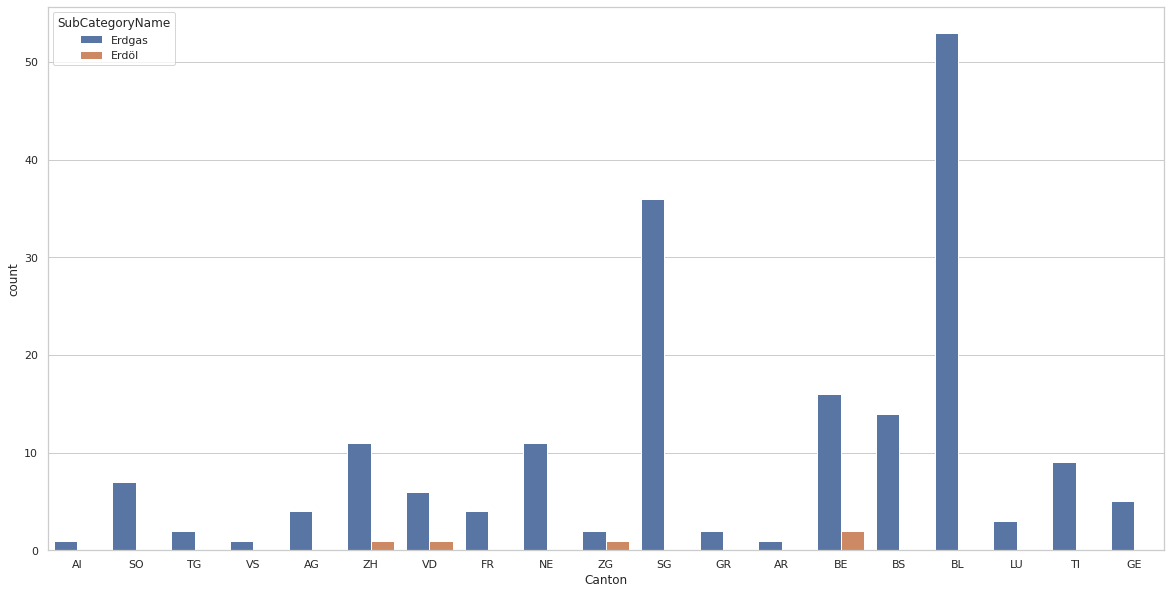

In [71]:
sns.countplot(data=epp[epp.MainCategory == 'maincat_4'], x='Canton', hue='SubCategoryName')

<AxesSubplot:xlabel='Canton', ylabel='TotalPower'>

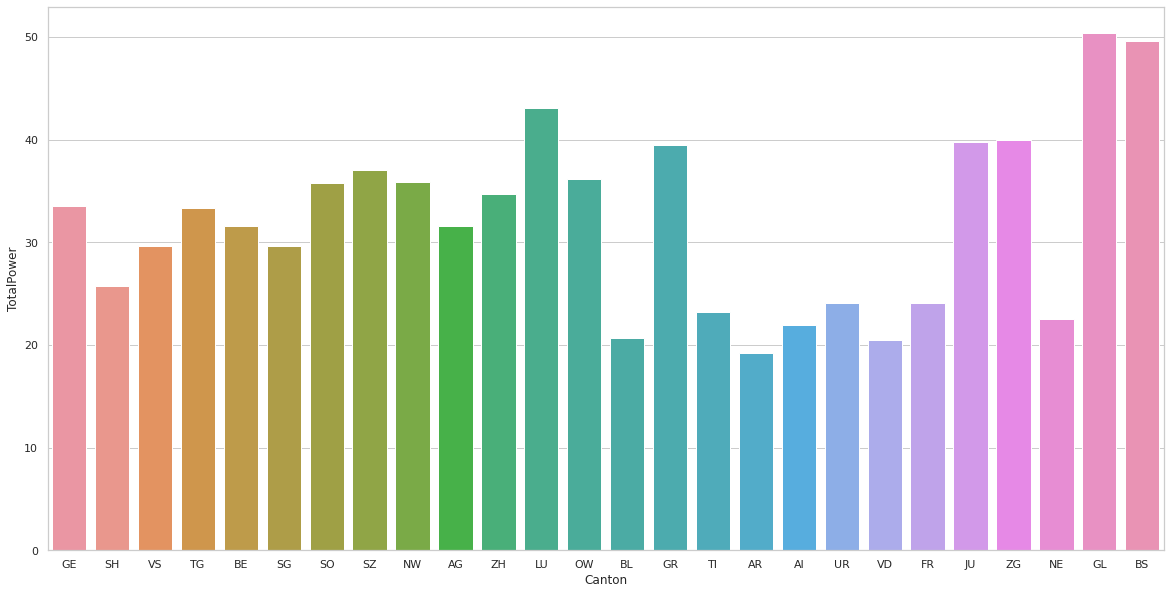

In [79]:
sns.barplot(data=epp[epp.MainCategory == 'maincat_2'], x='Canton',y='TotalPower', ci=None)

In [9]:
photovoltaik = epp[(epp['MainCategory'] == 'maincat_2') & (epp['SubCategory'] == 'subcat_2')]

<AxesSubplot:xlabel='TotalPower', ylabel='Count'>

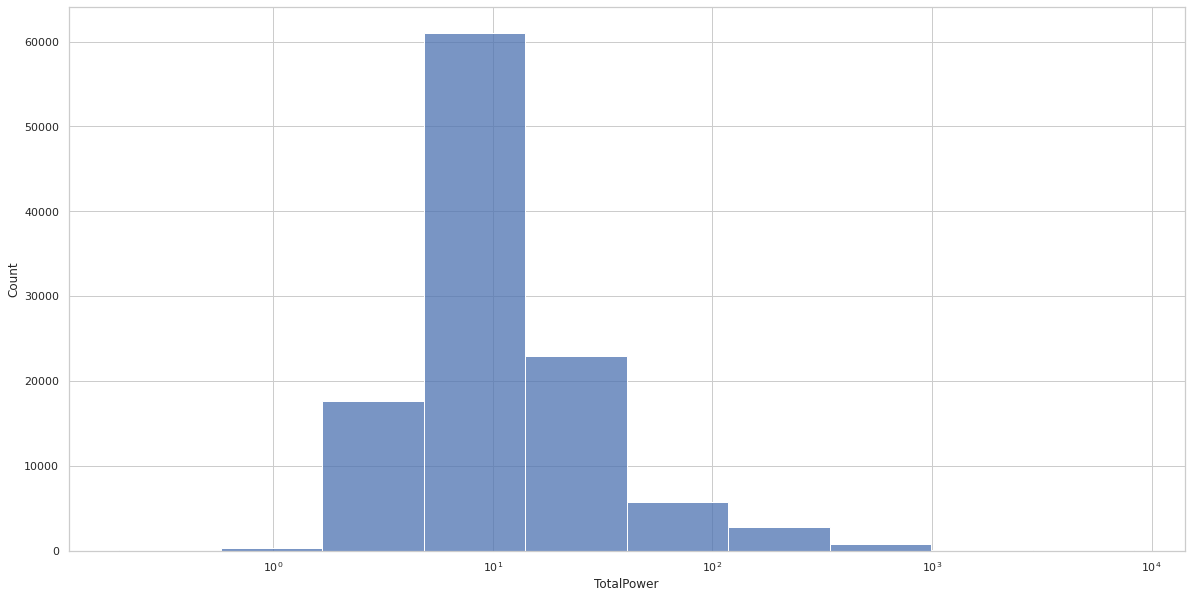

In [18]:
sns.histplot(data=photovoltaik, x='TotalPower', bins=10, log_scale=True)

<AxesSubplot:xlabel='TotalPower', ylabel='Count'>

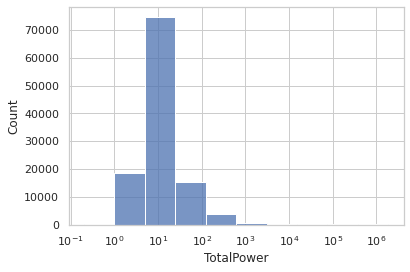

In [6]:
sns.set_theme(style="whitegrid")
sns.histplot(data=epp, x='TotalPower', bins=10, multiple="stack", log_scale=True)


<AxesSubplot:xlabel='BeginningOfOperation', ylabel='TotalPower'>

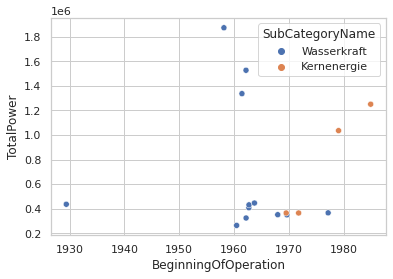

In [55]:
scatter = sns.scatterplot(data=epp[epp.TotalPower > 0.25e6], x = 'BeginningOfOperation', y="TotalPower", hue="SubCategoryName")
#scatter.set_yscale("log")
scatter

In [56]:
epp[epp.TotalPower > 0.25e6]

,Address,PostCode,Municipality,Canton,BeginningOfOperation,InitialPower,TotalPower,MainCategory,SubCategory,PlantCategory,_x,_y,MainCategoryName,SubCategoryName,PlantCategoryName
xtf_id,,,,,,,,,,,,,,,
5646,Rue des Creusets 41,1948,Fionnay,VS,1958-03-07,1872000.0,1872000.0,maincat_1,subcat_1,plantcat_6,2589880.0,1097661.0,Wasserkraft,Wasserkraft,Pumpspeicherkraftwerk
5686,Binenweg 5,3904,Naters,VS,1969-09-01,349576.0,349576.0,maincat_1,subcat_1,plantcat_7,2644115.0,1131390.0,Wasserkraft,Wasserkraft,Speicherkraftwerk
5740,Tierfehd,8783,Linthal,GL,1962-03-18,1526000.0,1526000.0,maincat_1,subcat_1,plantcat_6,2718029.0,1192830.0,Wasserkraft,Wasserkraft,Pumpspeicherkraftwerk
5741,Vasönerstrasse,7314,Vadura,SG,1977-03-14,366000.0,366000.0,maincat_1,subcat_1,plantcat_6,2755487.0,1201728.0,Wasserkraft,Wasserkraft,Pumpspeicherkraftwerk
5742,Mettelstrasse 1,7162,Tavanasa,GR,1962-03-23,324000.0,324000.0,maincat_1,subcat_1,plantcat_7,NaN,NaN,Wasserkraft,Wasserkraft,Speicherkraftwerk
5776,Chemin du Gilloud 1,1920,Martigny,VS,1968-01-01,351000.0,351000.0,maincat_1,subcat_1,plantcat_6,2570854.0,1106562.0,Wasserkraft,Wasserkraft,Pumpspeicherkraftwerk
5788,Muglinè 1,7530,Zernez,GR,1962-09-24,408000.0,408000.0,maincat_1,subcat_1,plantcat_7,NaN,NaN,Wasserkraft,Wasserkraft,Speicherkraftwerk
5789,Ecône,1908,Riddes,VS,1929-06-01,435855.0,435855.0,maincat_1,subcat_1,plantcat_7,2582281.0,1111795.0,Wasserkraft,Wasserkraft,Speicherkraftwerk
6032,Ackersand,3922,Stalden,VS,1960-07-01,263700.0,263700.0,maincat_1,subcat_1,plantcat_6,2633290.0,1119950.0,Wasserkraft,Wasserkraft,Pumpspeicherkraftwerk


In [48]:
epp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113447 entries, 5646 to 175981
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Address               113262 non-null  object        
 1   PostCode              113447 non-null  int64         
 2   Municipality          113447 non-null  object        
 3   Canton                113447 non-null  object        
 4   BeginningOfOperation  113447 non-null  datetime64[ns]
 5   InitialPower          113447 non-null  float64       
 6   TotalPower            113447 non-null  float64       
 7   MainCategory          113447 non-null  object        
 8   SubCategory           113447 non-null  object        
 9   PlantCategory         109359 non-null  object        
 10  _x                    96628 non-null   float64       
 11  _y                    96628 non-null   float64       
 12  MainCategoryName      113447 non-null  object        
 